FINAL MAIN PROJRCT:CLASSIFICATION OF GIVEN DATASET USIMG SVM ALGORITHM

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sns.set()
data_set=pd.read_csv("mobile data set - mobile data set.csv")
data_set.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
data_set.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [ ]:
data_set.shape

(2000, 21)

In [ ]:
data_set.size

42000

In [ ]:
data_set.count()

battery_power    2000
blue             2000
clock_speed      2000
dual_sim         2000
fc               2000
four_g           2000
int_memory       2000
m_dep            2000
mobile_wt        2000
n_cores          2000
pc               2000
px_height        2000
px_width         2000
ram              2000
sc_h             2000
sc_w             2000
talk_time        2000
three_g          2000
touch_screen     2000
wifi             2000
price_range      2000
dtype: int64

In [ ]:
data_set["battery_power"].value_counts()

1872    6
618     6
1589    6
1715    5
1807    5
       ..
660     1
1452    1
1005    1
1372    1
858     1
Name: battery_power, Length: 1094, dtype: int64

In [ ]:
data_set.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<Axes: >

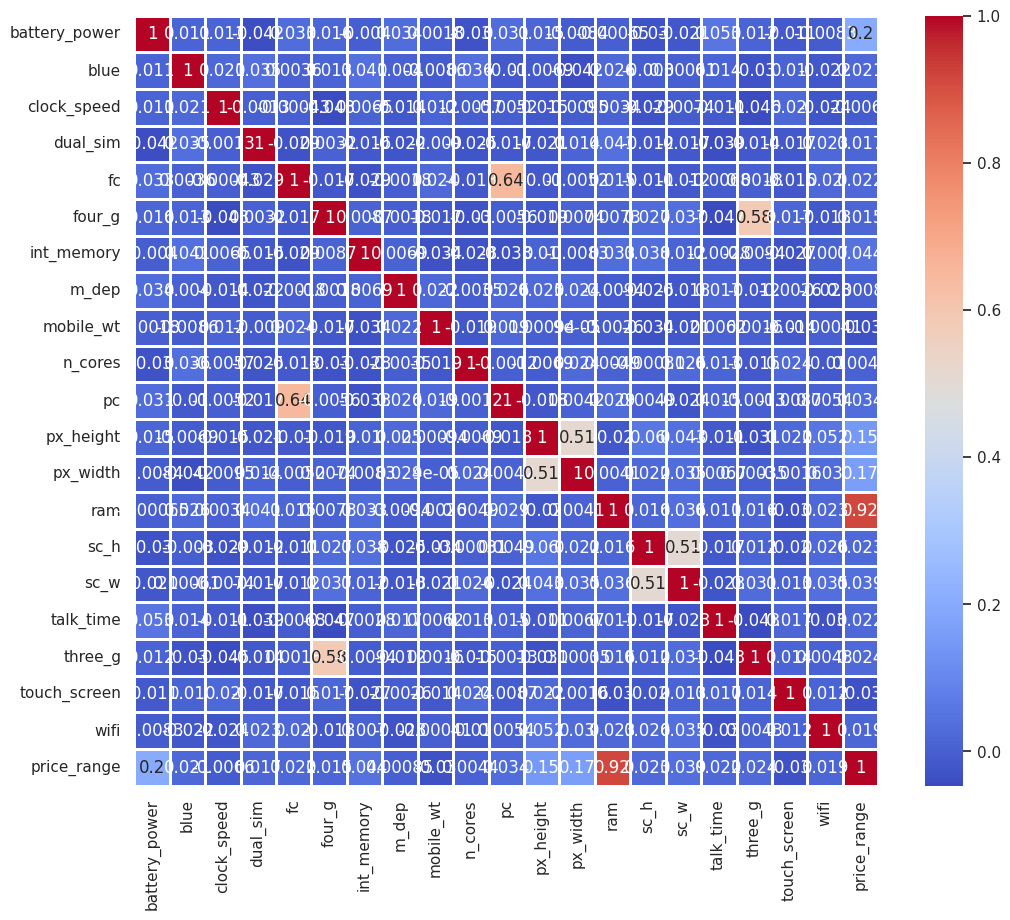

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data_set.corr(), annot=True, cmap="coolwarm", linecolor='white', linewidths=1)

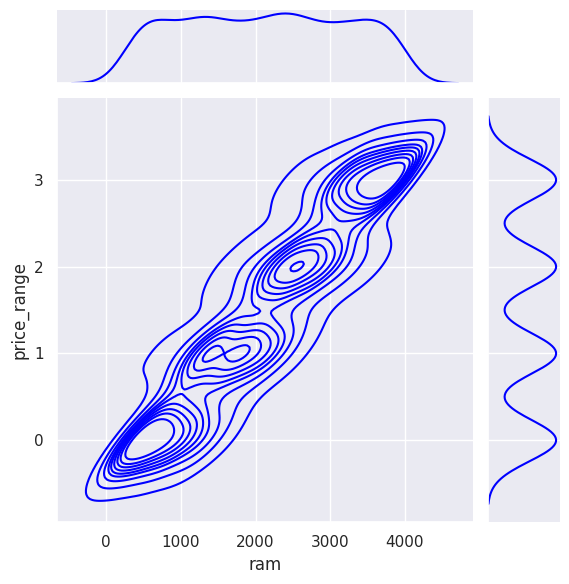

In [ ]:
sns.jointplot(x="ram",y="price_range",data=data_set,color="blue",kind="kde")


<Axes: xlabel='price_range', ylabel='int_memory'>

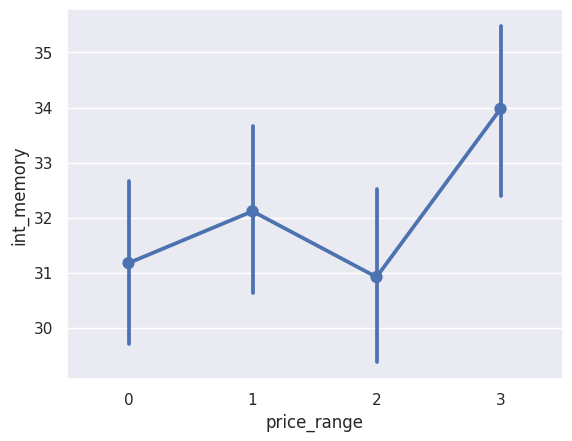

In [ ]:
sns.pointplot(y="int_memory",x="price_range",data=data_set)

<Axes: xlabel='price_range', ylabel='battery_power'>

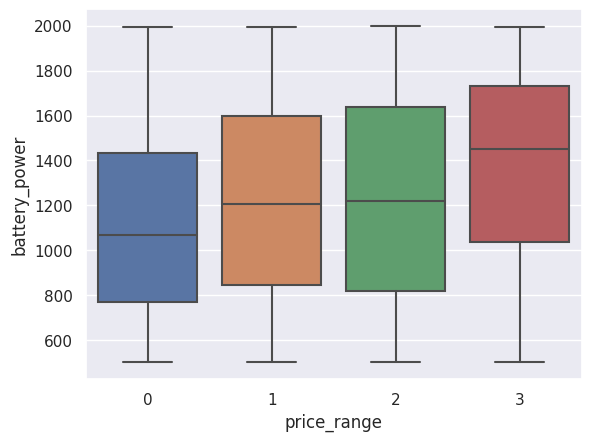

In [ ]:
sns.boxplot(x="price_range",y="battery_power",data=data_set)

<Axes: >

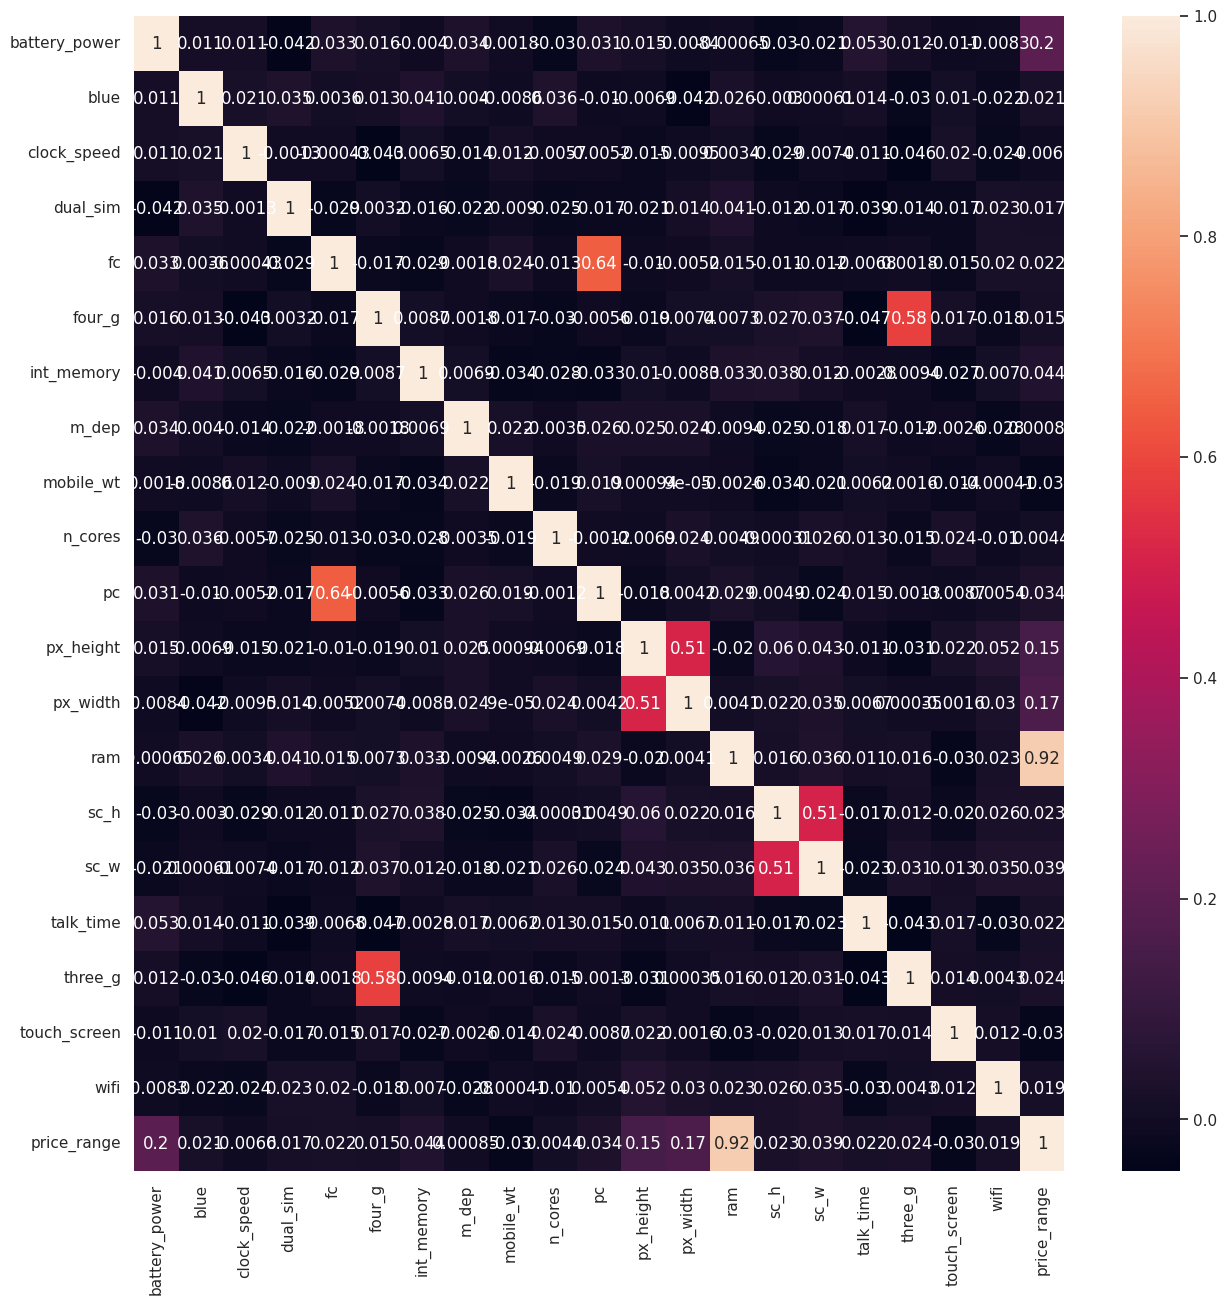

In [ ]:
corr_mat=data_set.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_mat,annot=True)

In [ ]:
x = data_set.iloc[:, :-1].values
y = data_set.iloc[:, -1].values
x[0]

array([8.420e+02, 0.000e+00, 2.200e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       7.000e+00, 6.000e-01, 1.880e+02, 2.000e+00, 2.000e+00, 2.000e+01,
       7.560e+02, 2.549e+03, 9.000e+00, 7.000e+00, 1.900e+01, 0.000e+00,
       0.000e+00, 1.000e+00])

In [ ]:
y[0]

1

In [ ]:
x = StandardScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [ ]:
x_train.shape

(1600, 20)

In [ ]:
x_test.shape

(400, 20)

In [ ]:
from sklearn.linear_model import LogisticRegression
lreg = LogisticRegression()
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)

In [ ]:
y_pred

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 2, 3, 0, 0, 3, 3, 3, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 3, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 0, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 2, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 3, 3, 1, 0, 2, 0, 0, 0, 3, 2, 1, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 1, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 3, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 1,

<Axes: >

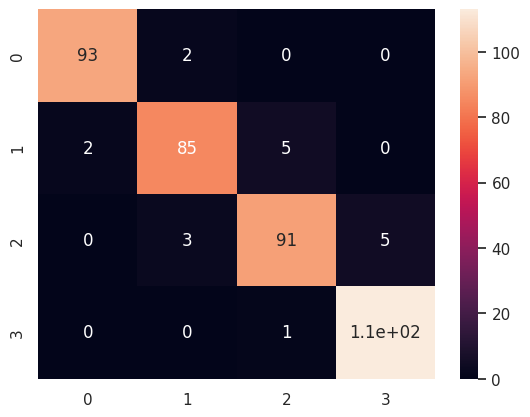

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.955

In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression Model: ",accuracy)

Accuracy of the Logistic Regression Model:  95.5


In [ ]:
print(y_pred)

[3 0 2 2 3 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 3 1 3 3 1 3 0 1 3 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 2 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 2 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 3 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 2 3 3 3
 0 0 2 3 3 1 0 2 0 0 0 3 2 1 2 2 1 1 0 2 3 3 0 0 1 3 3 1 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 2 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 3 0 1 3 0 2 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 0 0
 1 3 0 3 1 1 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 2 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 2 2 1 1 0 2 0]


In [ ]:
(unique, counts) = np.unique(y_pred, return_counts=True)
price_range = np.asarray((unique, counts)).T
print(price_range)

[[  0  95]
 [  1  90]
 [  2  97]
 [  3 118]]
